# 8. Text

In [ ]:
draw.Text(text, fontSize, x=None, y=None, *, center=False,
           valign=None, lineHeight=1, lineOffset=0, path=None,
           startOffset=None, pathArgs=None, tspanArgs=None,
           cairoFix=True, _skipCheck=False, **kwargs)

In [2]:
import draw2Svg as dw

## 8.1 Text Terminology

## 8.2 Simple Attributes and Properties of the `text` Element

Default is black as fill colour and no outline.

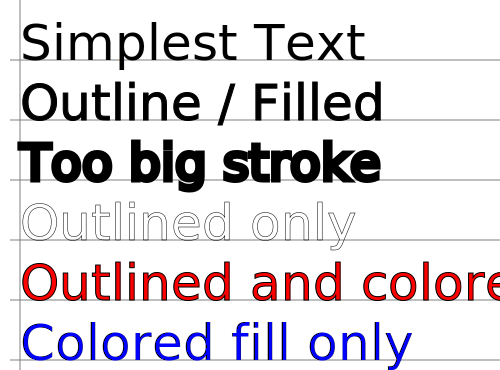

In [15]:
d = dw.Drawing(500,370)

# control lines
l = dw.Path(stroke='gray')
l.M(20,0).V(370)
for i in range(1,7):
    l.M(10,i*60).H(500)
d.append(l)

# default text, with outline, and outline only
d.append(dw.Text('Simplest Text',x=20,y=60,fontSize=50))
d.append(dw.Text('Outline / Filled',x=20,y=120,fontSize=50,stroke='black'))
d.append(dw.Text('Too big stroke',x=20,y=180,fontSize=50,stroke='black',stroke_width=5))
d.append(dw.Text('Outlined only',x=20,y=240,fontSize=50,stroke='black',stroke_width=0.5,fill='none'))
d.append(dw.Text('Outlined and colored',x=20,y=300,fontSize=50,stroke='black',fill='red'))
d.append(dw.Text('Colored fill only',x=20,y=360,fontSize=50,fill='blue'))

d

Text weight, style, decoration, and spacing attributes.

Why not font_size rather than fontSize?
And why can the font size not be set in the group for all elements?

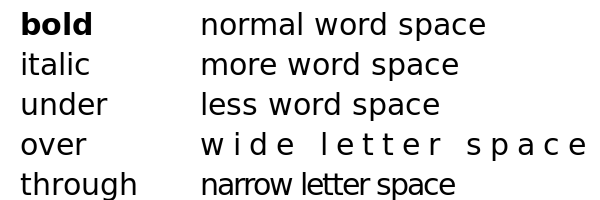

In [16]:
d = dw.Drawing(600,200)
d.append(dw.Text('bold',fontSize=30,x=20,y=35,font_weight='bold'))
d.append(dw.Text('italic',fontSize=30,x=20,y=75,font_style='italic'))
d.append(dw.Text('under',fontSize=30,x=20,y=115,text_decoration='underline'))
d.append(dw.Text('over',fontSize=30,x=20,y=155,text_decoration='overline'))
d.append(dw.Text('through',fontSize=30,x=20,y=195,text_decoration='line-through'))
d.append(dw.Text('normal word space',fontSize=30,x=200,y=35))
d.append(dw.Text('more word space',fontSize=30,x=200,y=75,word_spacing=10))
d.append(dw.Text('less word space',fontSize=30,x=200,y=115,word_spacing=-5))
d.append(dw.Text('wide letter space',fontSize=30,x=200,y=155,letter_spacing=8))
d.append(dw.Text('narrow letter space',fontSize=30,x=200,y=195,letter_spacing=-2))
d

## 8.3 Text Alignment

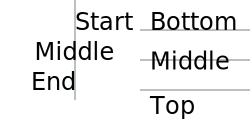

In [42]:
d = dw.Drawing(250,120)
d.append(dw.Line(75,100,75,0,stroke='gray'))
d.append(dw.Line(140,30,250,30,stroke='gray'))
d.append(dw.Line(140,60,250,60,stroke='gray'))
d.append(dw.Line(140,90,250,90,stroke='gray'))
d.append(dw.Text('Start',24,75,30,text_anchor='start'))
d.append(dw.Text('Middle',24,75,60,text_anchor='middle'))
d.append(dw.Text('End',24,75,90,text_anchor='end'))
d.append(dw.Text('Bottom',24,150,30,valign='bottom'))
d.append(dw.Text('Middle',24,150,60,valign='middle'))
d.append(dw.Text('Top',24,150,90,valign='top'))
d

## 8.4 The `tspan` Element

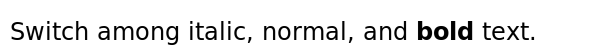

In [5]:
d = dw.Drawing(600,50)
txt = dw.Text('Switch among ',24,10,40)
txt.append(dw.TSpan('italic',font_style='italic'))
txt.append(dw.TSpan(', normal, and '))
txt.append(dw.TSpan('bold',font_weight='bold'))
txt.append(dw.TSpan(' text.'))
d.append(txt)
d

The `tspan` element can also be used to displace single characters:

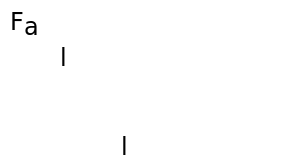

In [6]:
d = dw.Drawing(300,160)
txt = dw.Text('F',24,10,30)
txt.append(dw.TSpan('a',dy=5))
txt.append(dw.TSpan('l',dy=31,dx=21))
txt.append(dw.TSpan('l',dy=89,dx=54))
d.append(txt)
d

The same could be done without `tspan` in specifying a list for dx and dy.

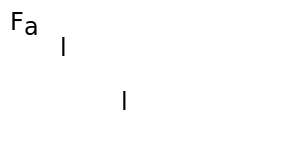

In [33]:
d = dw.Drawing(300,160)
d.append(dw.Text('Fall',24,10,30,dx='0,0,21,54',dy='0,5,21,54'))
d

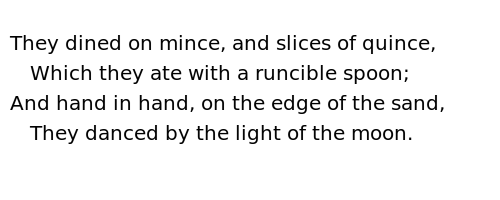

In [7]:
d = dw.Drawing(500,200)
txt = dw.Text('They dined on mince, and slices of quince,',20,10,50)
txt.append(dw.TSpan('Which they ate with a runcible spoon;',x=30,y=80))
txt.append(dw.TSpan('And hand in hand, on the edge of the sand,',x=10,y=110))
txt.append(dw.TSpan('They danced by the light of the moon.',x=30,y=140))
d.append(txt)
d

### Rotation

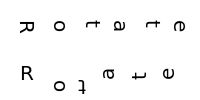

In [36]:
d = dw.Drawing(200,100)
d.append(dw.Text('Rotate',20,20,20,letter_spacing=20,rotate='90'))
d.append(dw.Text('Rotate',20,20,80,letter_spacing=20,rotate='0 90 180 270'))
d

Rotate letters with `tspan`:

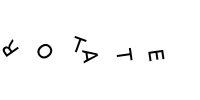

In [8]:
from random import randrange
d = dw.Drawing(200,100)
txt = dw.Text('',20,20,50,letter_spacing=20)
txt.append(dw.TSpan('R',rotate=randrange(360)))
txt.append(dw.TSpan('OT',rotate='50 20'))
txt.append(dw.TSpan('ATE',rotate=''.join([str(randrange(360)) for i in range(3)])))
d.append(txt)
d

Use of `baseline_shift`: NOT WORKING??

It should result in 'baseline-shift: "sub"', not 'baseline-shift="sub"' — how to do this?

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="200" height="100" viewBox="0 0 200 100">
<defs>
</defs>
<text x="20" y="50" font-size="20" dy="0em">C<tspan baseline-shift="sub">12</tspan><tspan>H</tspan><tspan baseline-shift="super">22</tspan></text>
</svg>


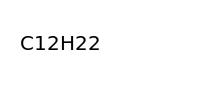

In [39]:
d = dw.Drawing(200,100)
txt = dw.Text('C',20,20,50)
txt.append(dw.TSpan('12',baseline_shift='sub'))
txt.append(dw.TSpan('H'))
txt.append(dw.TSpan('22',baseline_shift='super'))
d.append(txt)
print(d.asSvg())
d

## 8.5 Setting `textLength`

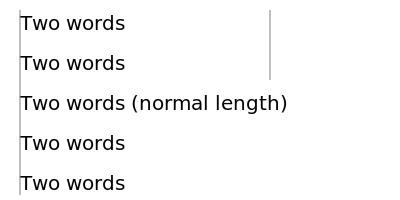

In [10]:
d = dw.Drawing(400,200)

s = 'Two words'
d.append(dw.Text(s,20,20,30,textLength=250,lengthAdjust='spacing'))
d.append(dw.Text(s,20,20,70,textLength=250,lengthAdjust='spacingAndGlyphs'))
d.append(dw.Text(s+' (normal length)',20,20,110))
d.append(dw.Text(s,20,20,150,textLength=80,lengthAdjust='spacing'))
d.append(dw.Text(s,20,20,190,textLength=80,lengthAdjust='spacingAndGlyphs'))

d.append(dw.Line(20,10,20,195,stroke='gray'))
d.append(dw.Line(270,80,270,10,stroke='gray'))
d

## 8.6 Vertical Text 
How to get the ':'? It should result in: 'glyph-orientation-vertical: 0'

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="100" height="350" viewBox="0 0 100 350">
<defs>
</defs>
<text x="10" y="20" font-size="20" transform="rotate(90,10,20)" dy="0em">Rotated 90</text>
<text x="50" y="20" font-size="20" writing-mode="tb" dy="0em">Writing Mode tb</text>
<text x="90" y="20" font-size="20" writing-mode="tb" glyph-orientation-vertical="0" dy="0em">Vertical zero</text>
</svg>


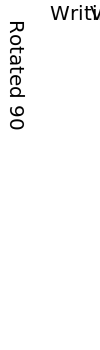

In [46]:
d = dw.Drawing(100,350)
d.append(dw.Text('Rotated 90',20,10,20,transform='rotate(90,10,20)'))
# tb = top to bottom
d.append(dw.Text('Writing Mode tb',20,50,20,writing_mode='tb'))
d.append(dw.Text('Vertical zero',20,90,20,writing_mode='tb',glyph_orientation_vertical=0))
print(d.asSvg())
d

## 8.7 Internationalization and Text

### 8.7.1 Unicode and Bidirectionality NOT WORKING because of the ':' issue
I cannot see how to deal with '\&#x3b1;\&#x3b2;\&#x3b3;\&#x3b4;\&#x3b5;' but that's not really important for now. Putting in the unicode characters works.

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="700" height="200" viewBox="0 0 700 200">
<defs>
</defs>
<text x="10" y="30" font-size="20" dy="0em">Greek:</text>
<text x="100" y="30" font-size="20" dy="0em">αβγδε</text>
<text x="10" y="60" font-size="20" dy="0em">Russian:</text>
<text x="100" y="60" font-size="20" dy="0em">абвгд</text>
<text x="10" y="90" font-size="20" dy="0em">Hebrew:</text>
<text x="100" y="90" font-size="20" dy="0em">אבגדה (written right to left)</text>
<text x="10" y="120" font-size="20" dy="0em">Arabic:</text>
<text x="100" y="120" font-size="20" dy="0em">ﺍﺑﻖﺕ (written right to left)</text>
<text x="10" y="150" font-size="20" dy="0em">This is <tspan direction="rlt" unicode-bidi="bidi-override" font-weight="bold">right-to-left</tspan><tspan> writing.</tspan></text>
</svg>


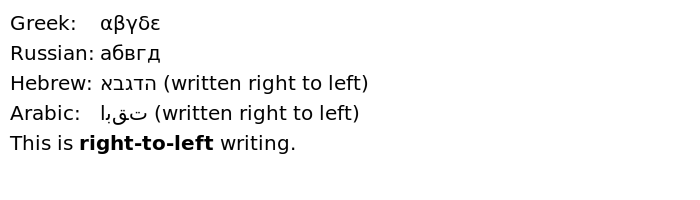

In [12]:
d = dw.Drawing(700,200)
d.append(dw.Text('Greek:',20,10,30))
d.append(dw.Text('αβγδε',20,100,30))
d.append(dw.Text('Russian:',20,10,60))
d.append(dw.Text('абвгд',20,100,60))
d.append(dw.Text('Hebrew:',20,10,90))
d.append(dw.Text('אבגדה (written right to left)',20,100,90))
d.append(dw.Text('Arabic:',20,10,120))
d.append(dw.Text('ﺍﺑﻖﺕ (written right to left)',20,100,120))
t = dw.Text('This is ',20,10,150)
t.append(dw.TSpan('right-to-left',direction='rlt',unicode_bidi='bidi-override',font_weight='bold'))
t.append(dw.TSpan(' writing.'))
d.append(t)
print(d.asSvg())
d

## 8.8 Text on a Path

Example from [draw2Svg docs](https://draw2svg.netlify.app/basic_shape/#text)

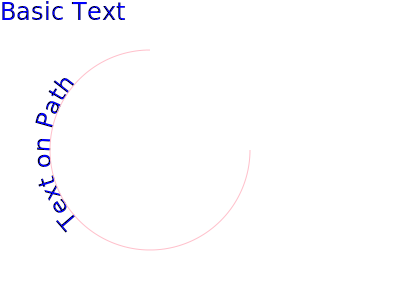

In [14]:
d = dw.Drawing(400, 300, idPrefix='textpath1')

# Basic Text
text_content = {
    'text' : 'Basic Text',
    'fontSize' : '24',
    'x': 0,
    'y': 20,
    'fill' : 'blue'
}
text1 = dw.Text(**text_content)

#Text on Path
pie = dw.Arc(cx=150, cy=150, r=100, startDeg=0, endDeg=90, fill="None", stroke="pink")
text_content = {
    'text' : 'Text on Path',
    'fontSize' : '24',
    'fill' : 'blue',
    'path' : pie,
    'startOffset': '50%',
}
text2 = dw.Text(**text_content)

d.append(text1)
d.append(text2)
d.append(pie)
#print(d.asSvg())
d

Example adapted from SVG Essentials:

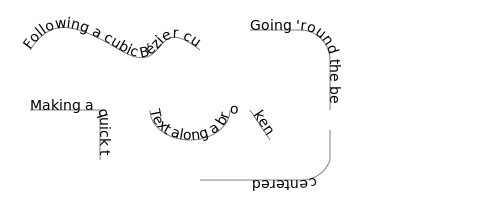

In [15]:
d = dw.Drawing(500,200,idPrefix='textpath2')

curve_path = dw.Path(stroke='gray',fill='none')
curve_path.M(30,50).C(50,20,70,20,120,50).S(150,10,200,50)

round_corner = dw.Path(stroke='gray',fill='none')
round_corner.M(250,30).L(300,30).A(30,30,0,0,1,330,60).L(330,110)

sharp_corner = dw.Path(stroke='gray',fill='none')
sharp_corner.M(30,110).L(100,110).L(100,160)

discontinuous = dw.Path(stroke='gray',fill='none')
discontinuous.M(150,110).A(40,30,0,1,0,230,110).M(250,110).L(270,140)

center_curve = dw.Path(stroke='gray',fill='none')
center_curve.M(330,130).L(330,160).A(30,30,0,0,1,300,180).L(200,180)

d.append(curve_path)
d.append(round_corner)
d.append(sharp_corner)
d.append(discontinuous)
d.append(center_curve)

t_cp = dw.Text('Following a cubic Bézier curve',14,path=curve_path)
t_rc = dw.Text("Going 'round the bend",14,path=round_corner)
t_sc = dw.Text('Making a quick turn',14,path=sharp_corner)
t_dc = dw.Text('Text along a broken path',14,path=discontinuous)
t_ct = dw.Text('centered',14,path=center_curve,offset='50%',text_anchor='middle')

d.append(t_cp)
d.append(t_rc)
d.append(t_sc)
d.append(t_dc)
d.append(t_ct)

#print(d.asSvg())
#d.saveSvg('blue.svg')
d

## Text Content Area

NOT WORKING

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="300" height="100" viewBox="0 0 300 100">
<defs>
</defs>
<text x="20" y="45" font-size="24" style="inline-size: 250px;" dy="0em">Auto-wrapped text in a 250px box.</text>
</svg>


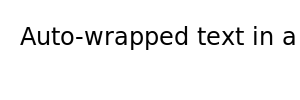

In [53]:
d = dw.Drawing(300,100)
txt = dw.Text('Auto-wrapped text in a 250px box.',24,20,45,style='inline-size: 250px;')
d.append(txt)
print(d.asSvg())
d.saveSvg('bla.svg')
d